# Project Description - Image classification using CNNs in Keras



# Objective:
The goal of the project is to create a classifier capable of determining a plant's species from a photo.
To implement the techniques learnt as a part of the course.

### Background
Can we differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has 
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

#### Data Description
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. 

The dataset can be download from Olympus.
The data file names are:
- images.npy
- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.Code snippet to convert the large dataset of images to numpy array was provided

#### Learning Outcomes
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model
- The motive of the project is to make the learners capable to handle images/image classification problems, during this 
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

## Data Info
Download the train images from the Olympus Platform.Do not download the dataset from Kaggle, as:
- The dataset is big.
- The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no 
labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way 
to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For 
our purpose we use this for our training and testing and validation purpose.


## Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:
- Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the 
problem statement should not be missed.
- Download the dataset from the Olympus platform.
- Upload the "images.npy" and “Labels.csv” file to google drive.
- Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem 
statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your 
model.

###  Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)


In [1]:
# Import the relevant Libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#from google.colab.patches import cv2_imshow
from PIL import Image

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# load the dataset:
images = np.load("images.npy")

In [4]:
len(images)

4750

In [5]:
# print shape of data
print('The shape of image is: ', images.shape)
# Extracting the height and width of an image 
h, w = images.shape[:2] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (4750, 128, 128, 3)
Height = 4750,  Width = 128


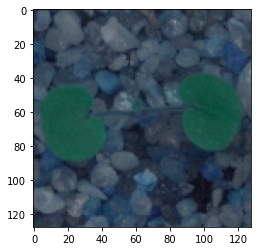

In [6]:
# Visualize the image in the dataset
# Show as example the first image; first = position 0 in numpy
plt.imshow(images[0])

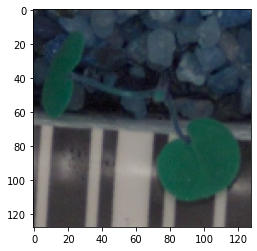

In [7]:
plt.imshow(images[10])

In [8]:
#read the Label data
LabelData = pd.read_csv('Labels.csv') 
LabelData.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [9]:
#identify the number of images in each lablel
images = np.array(images)
classes = np.array(LabelData)

print("images shape: ", images.shape)
print("classes shape: ", classes.shape)

classes2 = classes.reshape((4750,)) 
print("classes2.shape", classes2.shape)
  
for label in set(classes2):

  print("number of {} images is  -> {}".format(label, len(images[classes2 == label])))

images shape:  (4750, 128, 128, 3)
classes shape:  (4750, 1)
classes2.shape (4750,)
number of Fat Hen images is  -> 475
number of Scentless Mayweed images is  -> 516
number of Black-grass images is  -> 263
number of Shepherds Purse images is  -> 231
number of Charlock images is  -> 390
number of Maize images is  -> 221
number of Loose Silky-bent images is  -> 654
number of Common wheat images is  -> 221
number of Cleavers images is  -> 287
number of Sugar beet images is  -> 385
number of Small-flowered Cranesbill images is  -> 496
number of Common Chickweed images is  -> 611


Text(0.5, 0.98, 'Categorical Plotting')

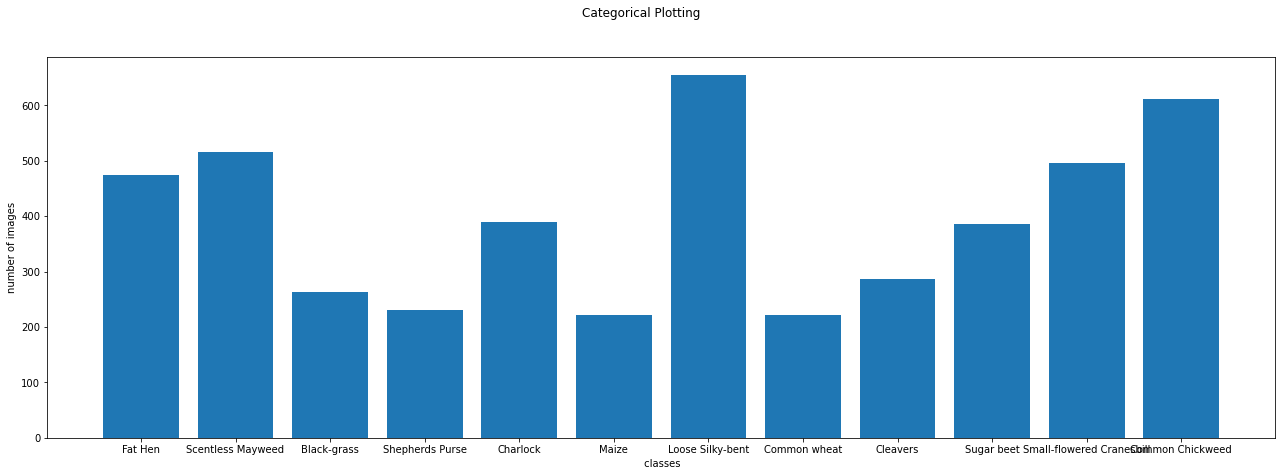

In [10]:
values =[]
labels=[]
for label in set(classes2):
  values.append(len(images[classes2 == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

### Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.

In [11]:
images2 = images.copy()

In [12]:
#Normalization of the data
images = images.astype('float32') # Conversion to float type from integer type.
images /= 255.0 # Division by 255


 original: 



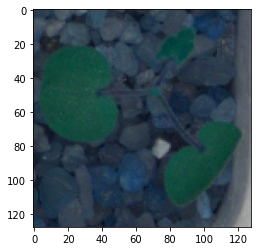

In [13]:
print('\n original: \n')
plt.imshow(images[40])

In [14]:
# Now we apply a gaussian blur filter to the image to reduce the noise in the image
i = 20
img = images[i]
for idx, img in enumerate(images):
  images[idx] = cv2.GaussianBlur(img, (15, 15), 0)


 Output after gaussian blurring: 



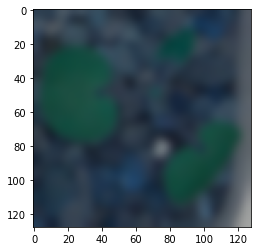

In [15]:
#show an example image segment after gaussian blurring
print('\n Output after gaussian blurring: \n')
plt.imshow(images[40])


 Output after gaussian blurring: 



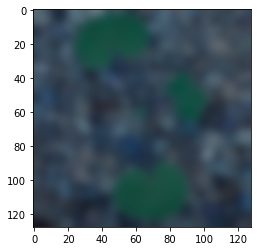

In [16]:
#show an example image segment after gaussian blurring
print('\n Output after gaussian blurring: \n')
plt.imshow(images[75])

### Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data 
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s 
already in the compatible shape, then comment in the notebook that it’s already in compatible shape

In [17]:
# Convert labels to one hot vectors.
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes2)

In [18]:
# Print, as an example,  the label for y_train[0]
print(y[0])

[0 0 0 0 0 0 0 0 0 0 1 0]


In [19]:
# Split the dataset into training, testing, and validation set. 
#(Hint: First split images and labels into training and testing set with test_size = 0.3. 
# Then further split test data into test and validation set with test_size = 0.5) 
random_seed = 50
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=random_seed)

In [20]:
# further split test data into test and validation set with test_size = 0.5
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [21]:
# to have a version not blurred.
random_seed = 50
X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(images2, y, test_size=0.3, random_state=random_seed)

In [22]:
X_test_ref, X_val_ref, y_test_ref, Y_val_ref = train_test_split(X_test_ref,y_test_ref, test_size = 0.5, random_state=random_seed)

In [23]:
# Check the shape of data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


In [24]:
X_train.shape[1:]

(128, 128, 3)

In [25]:
# Reshape data into shapes compatible with Keras models if it’s not already.
# If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape

# comment: Data is already in the compatible shape!!!

### Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [26]:
# Please note: After exhaustive search in colabs, this model turned out to be the best I could obtain

# Define the Layers

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

#### Set optimizer and loss function.

In [27]:
#Configure for use of  Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [28]:
# Configure for use of  categorical crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [29]:
# Summary of the Network structure. A review suggests the model was implemented correctly
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

### Fit and evaluate model and print confusion matrix. (10 Marks)

In [30]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 12
epochs = 40
num_predictions = 20

In [31]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('seedlng_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

Epoch 1/40
104/104 [==============================] - ETA: 0s - loss: 3.1694 - accuracy: 0.2078
Epoch 00001: val_loss improved from inf to 2.50084, saving model to seedlng_cnn_checkpoint_01_loss2.5008.h5
104/104 [==============================] - 94s 902ms/step - loss: 3.1694 - accuracy: 0.2078 - val_loss: 2.5008 - val_accuracy: 0.1431
Epoch 2/40
104/104 [==============================] - ETA: 0s - loss: 1.7939 - accuracy: 0.3802
Epoch 00002: val_loss did not improve from 2.50084
104/104 [==============================] - 97s 936ms/step - loss: 1.7939 - accuracy: 0.3802 - val_loss: 2.7670 - val_accuracy: 0.0379
Epoch 3/40
104/104 [==============================] - ETA: 0s - loss: 1.5762 - accuracy: 0.4514
Epoch 00003: val_loss did not improve from 2.50084
104/104 [==============================] - 106s 1s/step - loss: 1.5762 - accuracy: 0.4514 - val_loss: 2.7331 - val_accuracy: 0.0533
Epoch 4/40
104/104 [==============================] - ETA: 0s - loss: 1.4738 - accuracy: 0.4914
Epoch 

Epoch 28/40
104/104 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.7681
Epoch 00028: val_loss did not improve from 0.65908
104/104 [==============================] - 91s 871ms/step - loss: 0.6567 - accuracy: 0.7681 - val_loss: 1.3218 - val_accuracy: 0.5428
Epoch 29/40
104/104 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.7805
Epoch 00029: val_loss did not improve from 0.65908
104/104 [==============================] - 91s 876ms/step - loss: 0.6320 - accuracy: 0.7805 - val_loss: 0.9422 - val_accuracy: 0.6760
Epoch 30/40
104/104 [==============================] - ETA: 0s - loss: 0.6116 - accuracy: 0.7931
Epoch 00030: val_loss improved from 0.65908 to 0.62676, saving model to seedlng_cnn_checkpoint_30_loss0.6268.h5
104/104 [==============================] - 90s 869ms/step - loss: 0.6116 - accuracy: 0.7931 - val_loss: 0.6268 - val_accuracy: 0.8135
Epoch 31/40
104/104 [==============================] - ETA: 0s - loss: 0.5920 - accuracy: 0.7

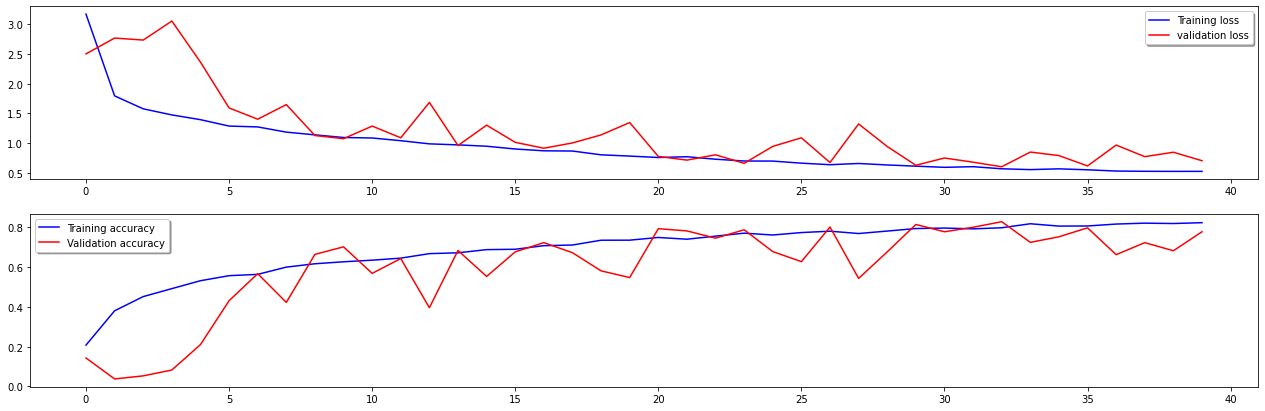

In [32]:
# fit the model
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val,Y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**save the model and its weights**

In [ ]:
#model.save('./seedlng_cnn_checkpoint_17_loss0.8892.h5')                     # save classifier (model) and architecture to single file

#model.save_weights('./seedlng_cnn_checkpoint_17_loss0.8892_weights.h5')     # weights are saved directly from the model.

*Check the current directory if the weights have been saved*

In [33]:
# evaluate the score for the trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 3s 147ms/step - loss: 0.6663 - accuracy: 0.7711
Test loss: 0.6662713289260864
Test accuracy: 0.7710674405097961


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

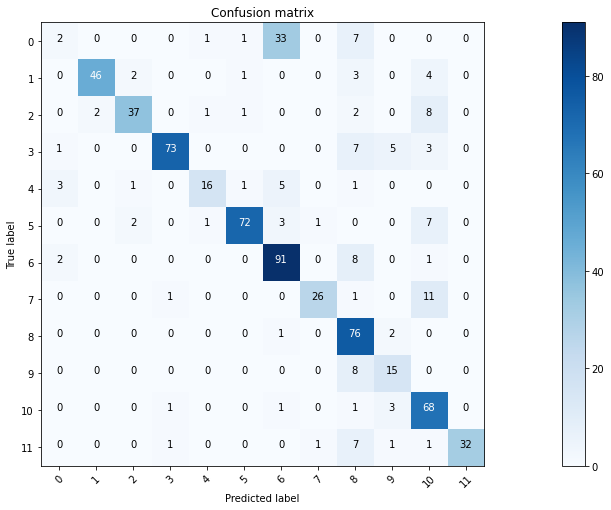

In [35]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12)) 

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

#### Visualizing predictions means plotting the random image with its true label as well as the predicted label. You can use matplotlib to plot the NumPy array.

**Test the model on one single image from the test folders**

In [36]:
Predicted_classes = np.argmax(model.predict(X_test), axis=-1)

In [37]:
wrong_preds = X_test[Predicted_classes != np.argmax(y_test)]

In [38]:
 set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

random image
Predicted class: Loose Silky-bent
Actual class: Loose Silky-bent


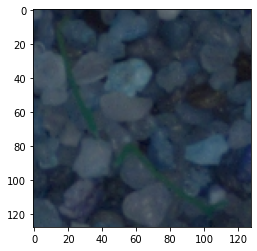

In [39]:
i = 2
pred = Predicted_classes[i]                
act = np.argmax(y_test[i])
print("random image")

print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test_ref[2])

random image
Predicted class: Small-flowered Cranesbill
Actual class: Small-flowered Cranesbill


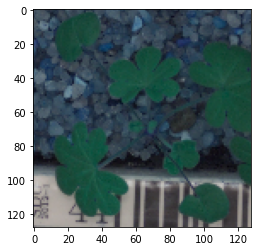

In [40]:
i = 3
pred = Predicted_classes[i]                
act = np.argmax(y_test[i])
print("random image")

print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test_ref[3])

random image
Predicted class: Loose Silky-bent
Actual class: Black-grass


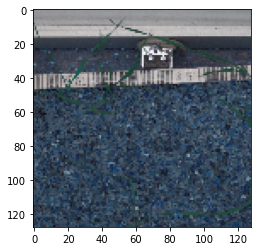

In [42]:
i = 33
pred = Predicted_classes[i]                
act = np.argmax(y_test[i])
print("random image")

print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test_ref[33])

##Although the model misclassified for this case, several other saved models classified all cases 100%. However I had difficulty
##in loading previously saved models

random image
Predicted class: Cleavers
Actual class: Cleavers


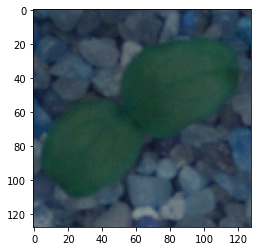

In [141]:
i = 36
pred = Predicted_classes[i]                
act = np.argmax(y_test[i])
print("random image")

print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test_ref[36])

random image
Predicted class: Common Chickweed
Actual class: Common Chickweed


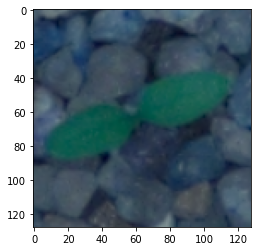

In [131]:
i = 59
pred = Predicted_classes[i]                
act = np.argmax(y_test[i])
print("random image")

print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test_ref[59])

### Summary and Conclusion

#### In The goal of the project was to create a classifier capable of determining a plant's species from a photo. 
The application of Machine Learning (ML) techniques for automatic Plant Seedling classification has become an important field of research. Specifically, CNNs have been recently applied in the agriculture domain for plan species identification, weed detection and plan disease recognition. 
In this project the use of CNN was investigated. The details of the CNN model are given. The work included a preprocessing stage, construction of the CNN model architecture, training of the model and tuning its parameters, and testing and evaluation of the model performance. 
In summary, our classifier achieved a reasonable level of accuracy and was able to classify correctly the inputs given. Although, not shown, a significant effort involved investigation of the optimum CNN model and parameters and this was largely done in the Google 'colabs' environment due to available CPU and GPU processing power. 


Reference: "A Convolution Neural Network-Based Seed Classification System".Gulzer, Y. et. al,Symmetry, 2020.
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwi0uLGql6zvAhVYQ80KHXIDDJcQFjACegQIBBAD&url=https%3A%2F%2Fwww.mdpi.com%2F2073-8994%2F12%2F12%2F2018%2Fpdf&usg=AOvVaw1oyYdY1Nsn0bPvuz_3o77F
